# CCD Processing of M42
## Sophie Clark

In [181]:
%matplotlib inline

In [182]:
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')

In [183]:
import glob
import os

In [184]:
os.chdir('C:\\Users\\sophi\\AST3722C\\Lab4')

In [185]:
pwd

'C:\\Users\\sophi\\AST3722C\\Lab4'

In [186]:
biases = glob.glob('bias_2_23_*.FIT')
# all of these are 0.04 seconds
biases

['bias_2_23_0d04001.FIT',
 'bias_2_23_0d04002.FIT',
 'bias_2_23_0d04003.FIT',
 'bias_2_23_0d04004.FIT',
 'bias_2_23_0d04005.FIT',
 'bias_2_23_0d04006.FIT',
 'bias_2_23_0d04007.FIT',
 'bias_2_23_0d04008.FIT',
 'bias_2_23_0d04009.FIT',
 'bias_2_23_0d04010.FIT']

In [187]:
darks = glob.glob("dark_2_23*.FIT")
# all of these are 10 seconds
darks

['dark_2_23_10001.FIT',
 'dark_2_23_10002.FIT',
 'dark_2_23_10003.FIT',
 'dark_2_23_10004.FIT',
 'dark_2_23_10005.FIT',
 'dark_2_23_10006.FIT',
 'dark_2_23_10007.FIT',
 'dark_2_23_10008.FIT',
 'dark_2_23_10009.FIT',
 'dark_2_23_10010.FIT']

In [188]:
clear_flat = glob.glob("twilight_2_23*FIT")
clear_flat

['twilight_2_23_B_1001.FIT',
 'twilight_2_23_B_1002.FIT',
 'twilight_2_23_B_1003.FIT',
 'twilight_2_23_B_1d5001.FIT',
 'twilight_2_23_B_1d5002.FIT',
 'twilight_2_23_B_1d5003.FIT',
 'twilight_2_23_I_0d75001.FIT',
 'twilight_2_23_I_0d75002.FIT',
 'twilight_2_23_I_0d75003.FIT',
 'twilight_2_23_V_0d75001.FIT',
 'twilight_2_23_V_0d75002.FIT',
 'twilight_2_23_V_0d75003.FIT']

In [189]:
from astropy.io import fits

In [190]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)

In [191]:
del bias_timestream

In [192]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

4.984391350804977

In [193]:
clear_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in clear_flat]
mean_clear_flat = np.mean(clear_flat_timestream, axis=0)
del clear_flat_timestream

In [194]:
bias_subtracted_clear_flat = mean_clear_flat - mean_bias

In [195]:
gain = fits.getheader('twilight_2_23_B_1d5003.FIT')['EGAIN']

In [196]:
flat_poisson_uncertainty = (bias_subtracted_clear_flat)**0.5

In [197]:
flat_singleframe_uncertainty = (flat_poisson_uncertainty**2 + readnoise**2)**0.5

In [198]:
flat_total_uncertainty = ((flat_singleframe_uncertainty/np.sqrt(len(clear_flat)))**2 + mean_bias_noise**2)**0.5

In [199]:
mean_of_flat = np.mean(bias_subtracted_clear_flat)
mean_of_flat

44723.381885360344

In [200]:
normalized_mean_clear_flat = bias_subtracted_clear_flat / mean_of_flat
np.mean(normalized_mean_clear_flat)

0.9999999999999997

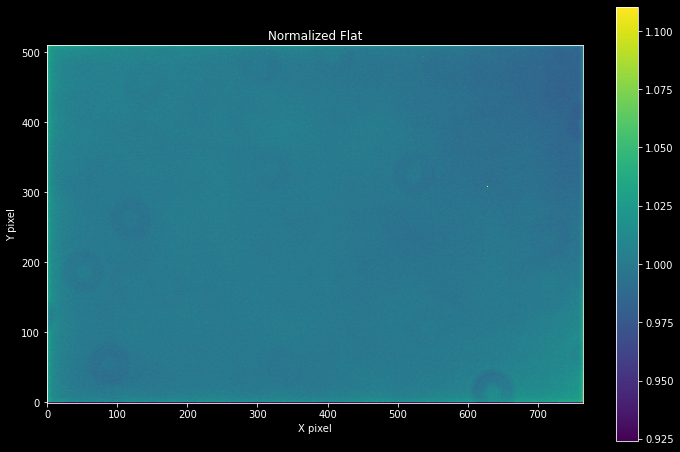

In [201]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_clear_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [202]:
normalized_flat_uncertainty = flat_total_uncertainty / mean_of_flat

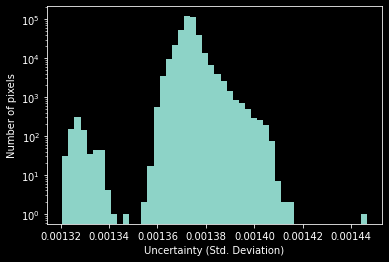

In [203]:
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty.ravel(), bins=50, log=True)

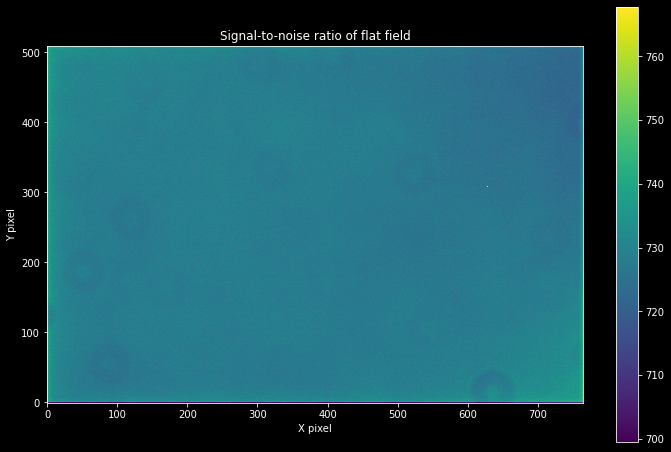

In [204]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field")
pl.imshow(normalized_mean_clear_flat / normalized_flat_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [205]:
darks_10s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks]
average_10s_dark = np.mean(darks_10s, axis=0)
stddev_10s_dark = np.std(darks_10s, axis=0)
del darks_10s

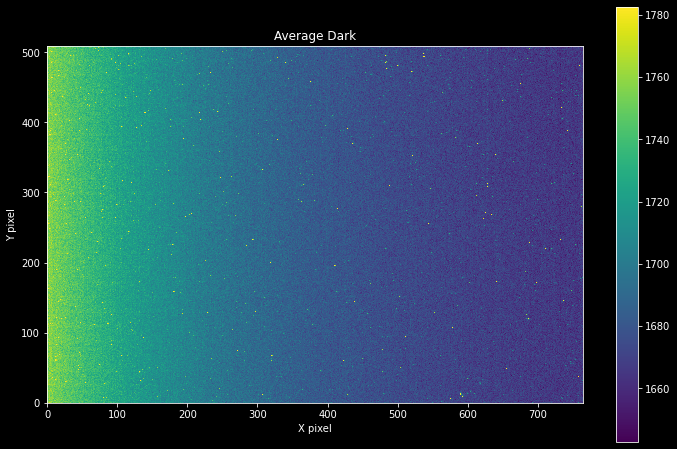

In [206]:
pl.figure(figsize=(12,8))
pl.imshow(average_10s_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [207]:
uncertainty_on_10s_mean_dark = stddev_10s_dark / np.sqrt(len(darks))

# B Filter

In [208]:
fn = 'm42_2_23_B_10010.FIT'
gain = fits.getheader(fn)['EGAIN']
m42_B = fits.getdata(fn)*gain
# again, did not rename variable so I would not have to rename every instance of the variable

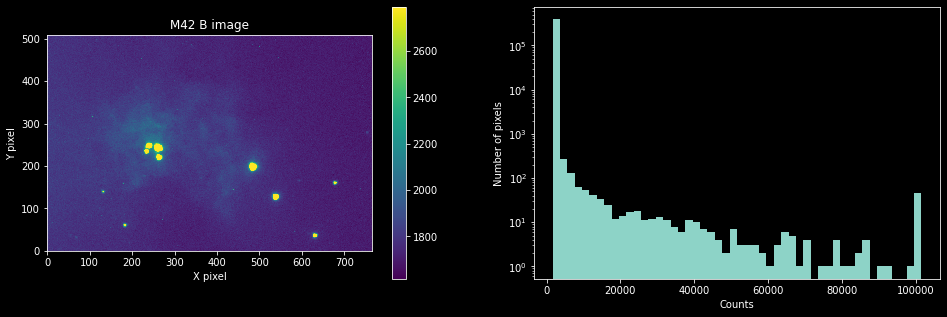

In [209]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_B, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("M42 B image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_B.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [210]:
m42_B_darksub = m42_B - average_10s_dark

In [211]:
m42_B_darksub_uncertainty = (m42_B_darksub + readnoise**2 + uncertainty_on_10s_mean_dark**2)**0.5

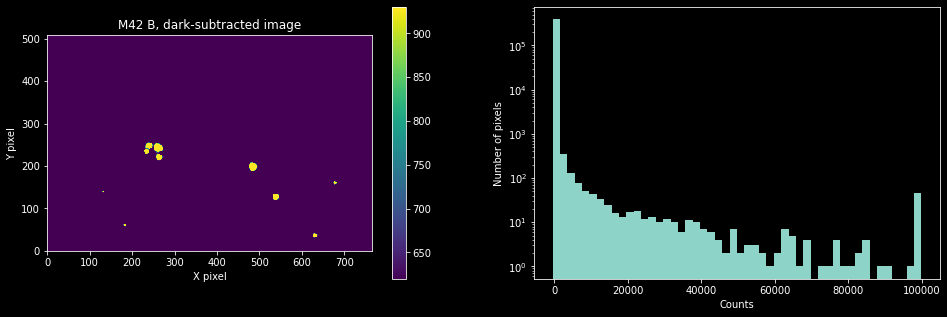

In [212]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_B_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("M42 B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_B_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [213]:
m42_B_darksub_flattened = m42_B_darksub / normalized_mean_clear_flat

In [214]:
m42_B_darksub_flattened_uncertainty = ((
    m42_B_darksub_uncertainty**2 / m42_B_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * m42_B_darksub_flattened**2)**0.5

<ipython-input-214-8490f6ce33a3>:2: RuntimeWarning: divide by zero encountered in true_divide
  m42_B_darksub_uncertainty**2 / m42_B_darksub**2 +
<ipython-input-214-8490f6ce33a3>:1: RuntimeWarning: invalid value encountered in multiply
  m42_B_darksub_flattened_uncertainty = ((


In [215]:
m42_B_darksub_flattened_uncertainty = ((
    m42_B_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_uncertainty**2 * m42_B_darksub**2 / normalized_mean_clear_flat**4
))**0.5

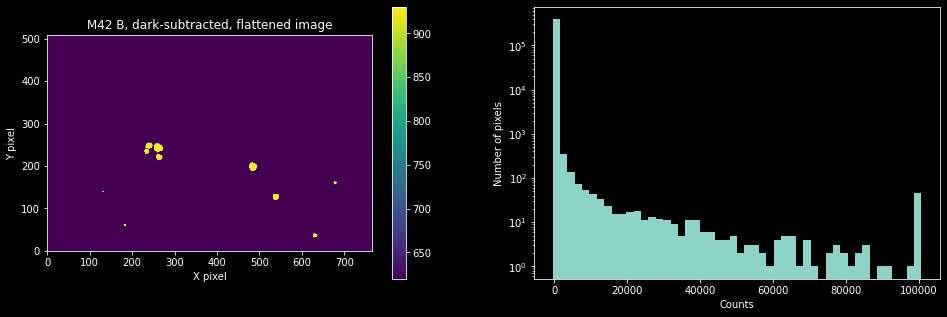

In [216]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_B_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("M42 B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(m42_B_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

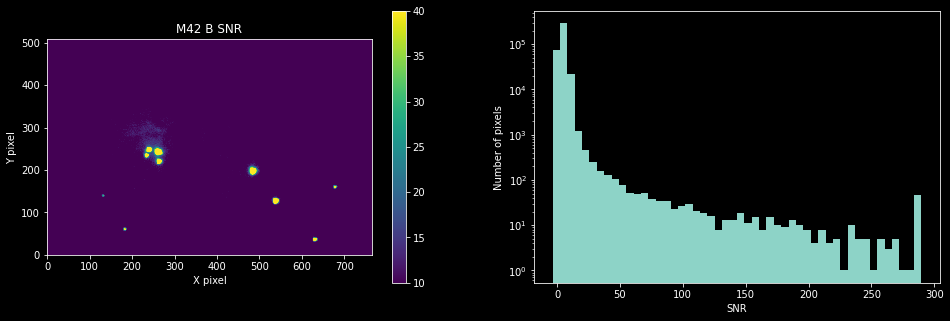

In [217]:
pl.figure(figsize=(16,5))
SNR = m42_B_darksub_flattened / m42_B_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("M42 B SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

In [218]:
header = fits.getheader('m42_2_23_B_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_B_darksub_flattened, header=header)
filehandle.writeto('m42_2_23_B_001_darksub_flattened.fits', overwrite=True)

In [219]:
header = fits.getheader('m42_2_23_B_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_B_darksub_flattened_uncertainty, header=header)
filehandle.writeto('m42_2_23_B_001_darksub_flattened_uncertainty.fits', overwrite=True)

# V Filter

In [220]:
fn = 'm42_2_23_V_10010.FIT'
gain = fits.getheader(fn)['EGAIN']
m42_V = fits.getdata(fn)*gain

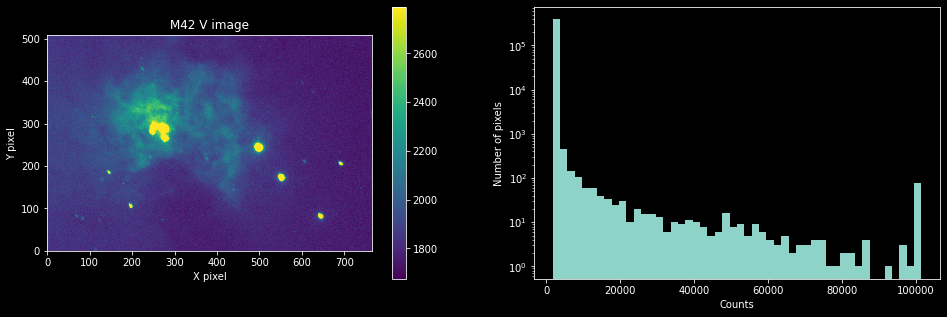

In [221]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_V, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("M42 V image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_V.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [222]:
m42_V_darksub = m42_V - average_10s_dark

In [223]:
m42_V_darksub_uncertainty = (m42_V_darksub + readnoise**2 + uncertainty_on_10s_mean_dark**2)**0.5

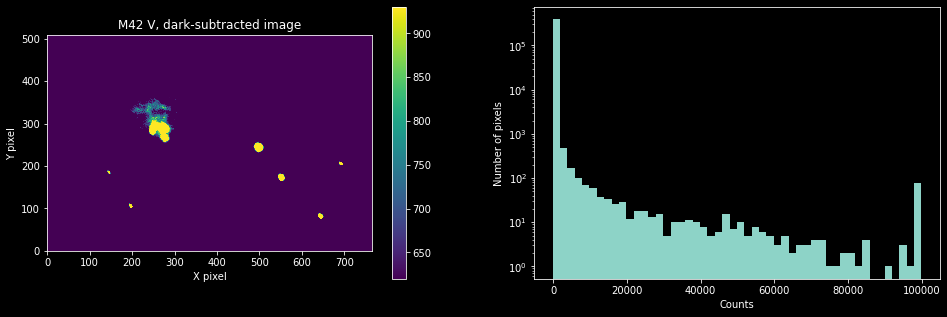

In [224]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_V_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("M42 V, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_V_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [225]:
m42_V_darksub_flattened = m42_V_darksub / normalized_mean_clear_flat

In [226]:
m42_V_darksub_flattened_uncertainty = ((
    m42_V_darksub_uncertainty**2 / m42_V_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * m42_V_darksub_flattened**2)**0.5

In [227]:
m42_V_darksub_flattened_uncertainty = ((
    m42_V_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_uncertainty**2 * m42_V_darksub**2 / normalized_mean_clear_flat**4
))**0.5

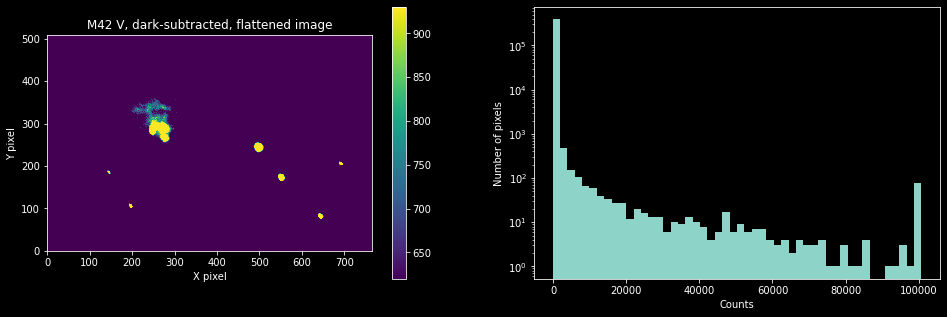

In [228]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_V_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("M42 V, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(m42_V_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

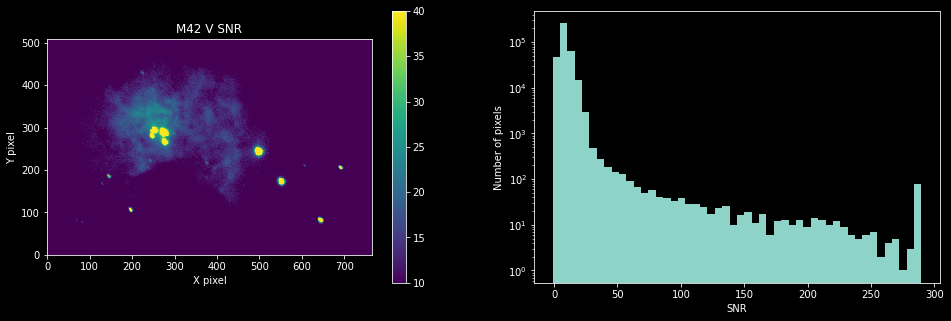

In [229]:
pl.figure(figsize=(16,5))
SNR = m42_V_darksub_flattened / m42_V_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("M42 V SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

In [230]:
header = fits.getheader('m42_2_23_V_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_V_darksub_flattened, header=header)
filehandle.writeto('m42_2_23_V_001_darksub_flattened.fits', overwrite=True)

In [231]:
header = fits.getheader('m42_2_23_V_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_V_darksub_flattened_uncertainty, header=header)
filehandle.writeto('m42_2_23_V_001_darksub_flattened_uncertainty.fits', overwrite=True)

# I Filter

In [232]:
fn = 'm42_2_23_I_10010.FIT'
gain = fits.getheader(fn)['EGAIN']
m42_I = fits.getdata(fn)*gain

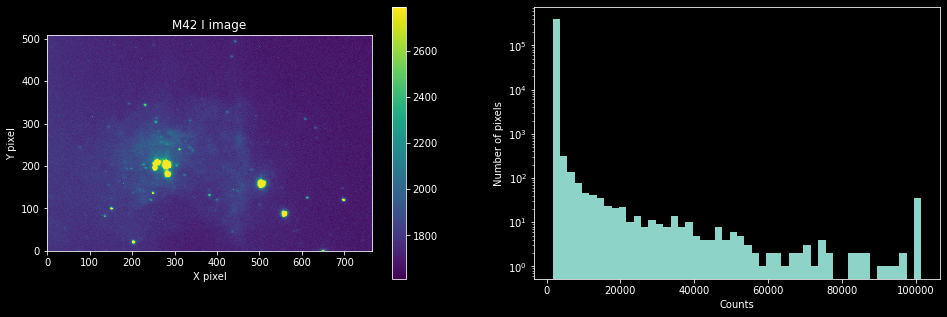

In [233]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_I, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("M42 I image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_I.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [234]:
m42_I_darksub = m42_I - average_10s_dark

In [235]:
m42_I_darksub_uncertainty = (m42_I_darksub + readnoise**2 + uncertainty_on_10s_mean_dark**2)**0.5

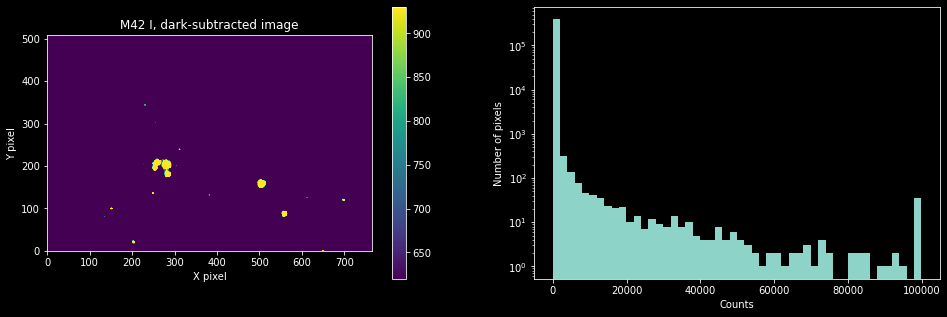

In [236]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_I_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("M42 I, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(m42_I_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [237]:
m42_I_darksub_flattened = m42_I_darksub / normalized_mean_clear_flat

In [238]:
m42_I_darksub_flattened_uncertainty = ((
    m42_I_darksub_uncertainty**2 / m42_I_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * m42_I_darksub_flattened**2)**0.5

<ipython-input-238-5e736bbcbf35>:2: RuntimeWarning: divide by zero encountered in true_divide
  m42_I_darksub_uncertainty**2 / m42_I_darksub**2 +
<ipython-input-238-5e736bbcbf35>:1: RuntimeWarning: invalid value encountered in multiply
  m42_I_darksub_flattened_uncertainty = ((


In [239]:
m42_I_darksub_flattened_uncertainty = ((
    m42_I_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_uncertainty**2 * m42_I_darksub**2 / normalized_mean_clear_flat**4
))**0.5

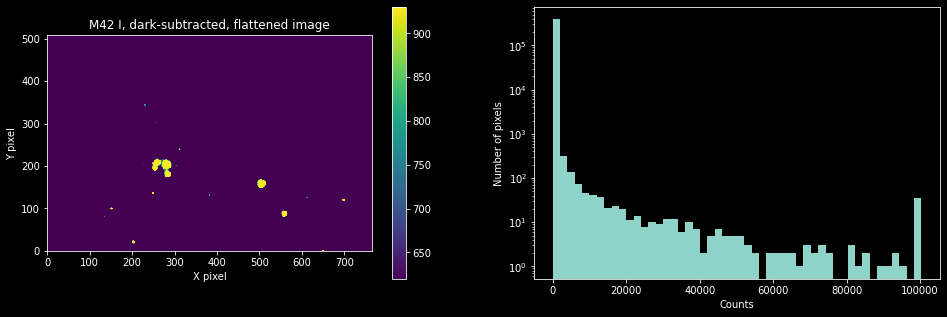

In [240]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(m42_I_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("M42 I, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(m42_I_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

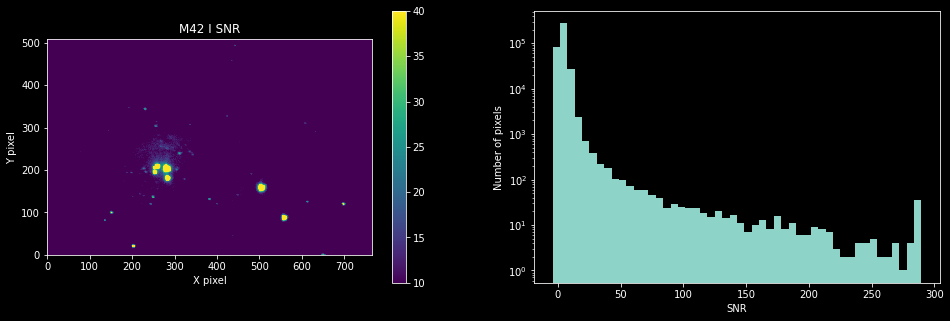

In [241]:
pl.figure(figsize=(16,5))
SNR = m42_I_darksub_flattened / m42_I_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("M42 I SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

In [242]:
header = fits.getheader('m42_2_23_I_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_I_darksub_flattened, header=header)
filehandle.writeto('m42_2_23_I_001_darksub_flattened.fits', overwrite=True)

In [243]:
header = fits.getheader('m42_2_23_I_10010.FIT')
filehandle = fits.PrimaryHDU(data=m42_I_darksub_flattened_uncertainty, header=header)
filehandle.writeto('m42_2_23_I_001_darksub_flattened_uncertainty.fits', overwrite=True)

## Data Comparison Paragraph


From this data reduction it is clear that all three filters of M42 have extremely prominent stars that stand out in each image after the data reduction process has been completed. However, there are some issues with the data here that were more severe here than they were with the Pleiades example data. For example, all three filters here have an SNR that spreads to a little less than 300, while the example data SNR spread to only approximately 45, likely due to greater sky background. Another difference of note is that the flat uncertainty of the M42 data is overall less than that of the Pleiades example data. It is important to note that the sources in all three filters of M42 appear larger and brightner than the sources in the Pleiades image, which does impact the values received in the data reduction. Although there is greater SNR in the M42 images, and greater flat uncertainty in the Pleiades images, they differ greatly enough to justify the results in the data reduction of both sources. 